# HW 5

## Problem 1

### a

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d

In [19]:
k = 1.38e-16 # cm^2 g s^-2 K^-1
m_e = 9.1e-28 # g
h = 6.626e-27 # cm^2 g s^-1
h_cosmo = .7
chi_HI_HII = 2.179e-11 # erg
T_0 = 2.726 # K
Omega_b = .0224/(h_cosmo**2)

def saha_RHS(z):
    n_H = 8e-6 * Omega_b * h**2 * (1+z)**3 #cm^-3
    return (1/n_H) * ((2*np.pi*m_e*k*T_0*(1+z))/(h**2))**3/2 * np.exp(-chi_HI_HII/(k*T_0*(1+z)))

def saha_LHS(X):
    return X**2/(1-X)

LHS = saha_LHS(X=.5)

zs = np.linspace(0, 1500, 1000)
RHSs = saha_RHS(zs)

z_from_LHS = interp1d(RHSs, zs)

z_at_half = z_from_LHS(LHS)
print(f"X=.5 when z = {z_at_half:.2f} and T = {T_0*(1+z_at_half):.2f} K")

X=.5 when z = 275.67 and T = 754.19 K


### b

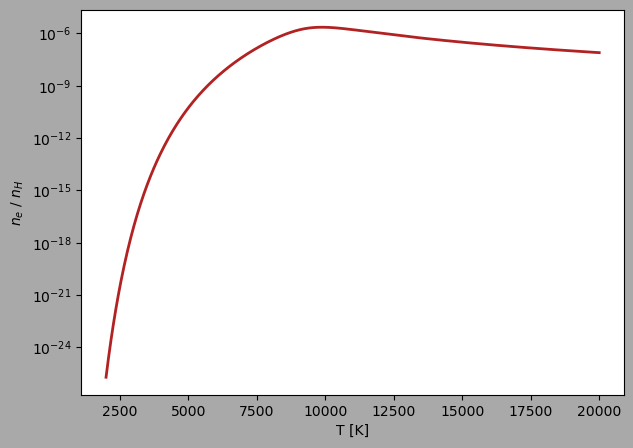

In [3]:
def original_saha_RHS(T, P_e=200):
    # with i = HI and i+1 = HII
    n_e = P_e/(k*T)

    return (2/n_e) * (1/2) * ((2*np.pi*m_e*k*T)/(h**2))**(3/2) * np.exp(-chi_HI_HII/(k*T))

def n2_over_nH(T, E_1_min_E_2=-10.2):
    ev_to_erg = 1.60218e-12
    E_1_min_E_2 *= ev_to_erg

    RHS = original_saha_RHS(T)

    return np.exp(E_1_min_E_2/(k*T))/(np.exp(E_1_min_E_2/(k*T))+1) * (1 - (RHS/(RHS+1)))

Ts = np.linspace(2e3, 2e4, 600)
fracs = n2_over_nH(Ts)

fig,ax = plt.subplots(figsize=(7,5))
fig.set_facecolor('darkgray')
ax.set_xlabel('T [K]')
ax.set_ylabel(r"$n_e$ / $n_H$")
ax.set_yscale('log')
plt.plot(Ts,fracs,color='firebrick',linewidth=2)

In [4]:
print(f"T_max = {Ts[fracs.argmax()]:.2f}")

T_max = 9873.12


### Part c

In [5]:
def n1_over_nHI(T, E1_min_E2=-10.2):
    ev_to_erg = 1.60218e-12
    E1_min_E2 *= ev_to_erg

    exponent = np.exp(E1_min_E2/(k*T))

    return (1+exponent)**-1

def n2_over_nHI(T, E1_min_E2=-10.2):
    ev_to_erg = 1.60218e-12
    E1_min_E2 *= ev_to_erg

    exponent = np.exp(E1_min_E2/(k*T))

    return exponent / (1+exponent)

print(f"n1/nHI = {n1_over_nHI(10**4):.7e}")
print(f"n2/nHI = {n2_over_nHI(10**4):.7e}\n")
print(f"n1/n2 = {n1_over_nHI(10**4)/n2_over_nHI(10**4):.2e}")

n1/nHI = 9.9999281e-01
n2/nHI = 7.1944030e-06

n1/n2 = 1.39e+05


### part d

In [6]:
sigma_LyAlph = 1e-14
sigma_HAlph = 1e-17
n2_over_n1 = n2_over_nHI(10**4)/n1_over_nHI(10**4)
optical_depth_ratio = (sigma_HAlph/sigma_LyAlph) * n2_over_n1

print(f"Tao_HAlpha/Tao_LyAlpha = {optical_depth_ratio:.2e}")

Tao_HAlpha/Tao_LyAlpha = 7.19e-09


## Problem 2

In [7]:
import pandas as pd

In [8]:
CIE_pd = pd.read_csv("hw5_data/CIE.dat", sep="\\s+", header=None)
CIE_pd

,0,1,2,3,4,5
0,10000.0,4.700000e-24,4.980000e-24,7.780000e-24,5.590000e-23,3.770000e-22
1,10470.0,7.620000e-24,7.790000e-24,9.550000e-24,3.090000e-23,6.960000e-23
2,10970.0,1.230000e-23,1.250000e-23,1.390000e-23,2.860000e-23,4.760000e-23
3,11490.0,1.970000e-23,1.980000e-23,2.110000e-23,3.410000e-23,4.930000e-23
4,12030.0,3.080000e-23,3.090000e-23,3.220000e-23,4.510000e-23,5.980000e-23
...,...,...,...,...,...,...
196,83180000.0,1.880000e-23,1.890000e-23,1.950000e-23,2.560000e-23,3.250000e-23
197,87100000.0,1.910000e-23,1.910000e-23,1.970000e-23,2.580000e-23,3.260000e-23
198,91200000.0,1.920000e-23,1.930000e-23,1.990000e-23,2.590000e-23,3.270000e-23
199,95500000.0,1.940000e-23,1.950000e-23,2.000000e-23,2.600000e-23,3.260000e-23


In [9]:
PIE_pd = pd.read_csv("hw5_data/PIE2.dat", sep="\\s+", header=None)
PIE_pd

,0,1,2,3,4,5
0,100000000.0,2.390000e-23,2.400000e-23,2.440000e-23,2.820000e-23,3.190000e-23
1,95012000.0,2.330000e-23,2.340000e-23,2.380000e-23,2.760000e-23,3.130000e-23
2,90273000.0,2.280000e-23,2.280000e-23,2.320000e-23,2.700000e-23,3.070000e-23
3,85770000.0,2.220000e-23,2.220000e-23,2.260000e-23,2.640000e-23,3.020000e-23
4,81491000.0,2.160000e-23,2.170000e-23,2.210000e-23,2.580000e-23,2.960000e-23
...,...,...,...,...,...,...
176,12272.0,9.500000e-25,1.010000e-24,1.600000e-24,7.620000e-24,1.420000e-23
177,11660.0,9.330000e-25,9.840000e-25,1.590000e-24,7.620000e-24,1.420000e-23
178,11078.0,9.070000e-25,9.780000e-25,1.580000e-24,7.650000e-24,1.430000e-23
179,10526.0,8.910000e-25,9.620000e-25,1.560000e-24,7.690000e-24,1.440000e-23


In [10]:
PINE_pd = pd.read_csv("hw5_data/PINE2.dat", sep="\\s+", header=None)
PINE_pd

,0,1,2,3,4,5
0,100000000.0,2.390000e-23,2.400000e-23,2.430000e-23,2.790000e-23,3.140000e-23
1,99000000.0,2.380000e-23,2.380000e-23,2.420000e-23,2.800000e-23,3.180000e-23
2,98010000.0,2.370000e-23,2.370000e-23,2.410000e-23,2.790000e-23,3.170000e-23
3,97030000.0,2.360000e-23,2.360000e-23,2.400000e-23,2.780000e-23,3.150000e-23
4,96060000.0,2.350000e-23,2.350000e-23,2.390000e-23,2.770000e-23,3.140000e-23
...,...,...,...,...,...,...
868,16300.0,NaN,NaN,NaN,NaN,1.520000e-23
869,16140.0,NaN,NaN,NaN,NaN,1.510000e-23
870,15980.0,NaN,NaN,NaN,NaN,1.520000e-23
871,15820.0,NaN,NaN,NaN,NaN,1.500000e-23


### Part a

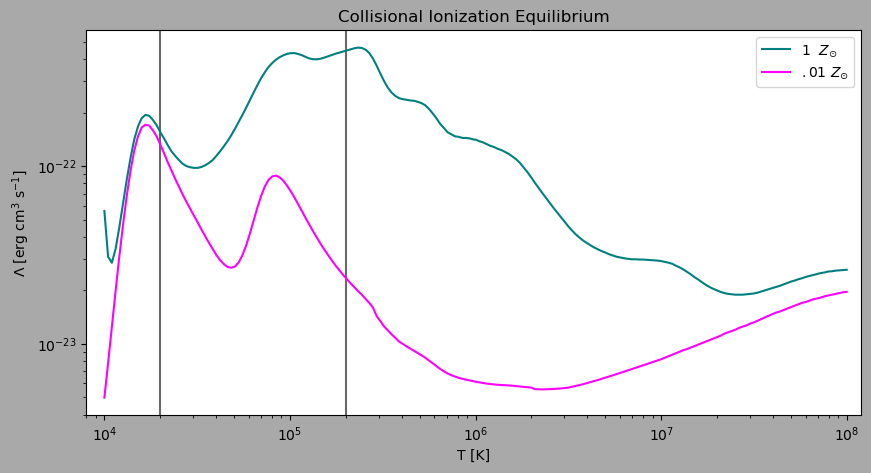

In [11]:
fig,ax = plt.subplots(figsize=(10,5))
fig.set_facecolor('darkgray')
ax.set_xlabel('T [K]')
ax.set_ylabel(r"$\Lambda$ [erg cm$^3$ s$^{-1}$]")
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_title("Collisional Ionization Equilibrium")
ax.set_xlim((8e3, 1.2e8))
ax.vlines(x=[2e4,2e5], ymin=1e-24, ymax=1e-21, color='dimgray')
plt.plot(CIE_pd[0], CIE_pd[4], color='teal', linewidth=1.5, label="$1\ \ Z_{\odot}$")
plt.plot(CIE_pd[0], CIE_pd[2], color='magenta', linewidth=1.5, label="$.01\ Z_{\odot}$")
plt.legend()

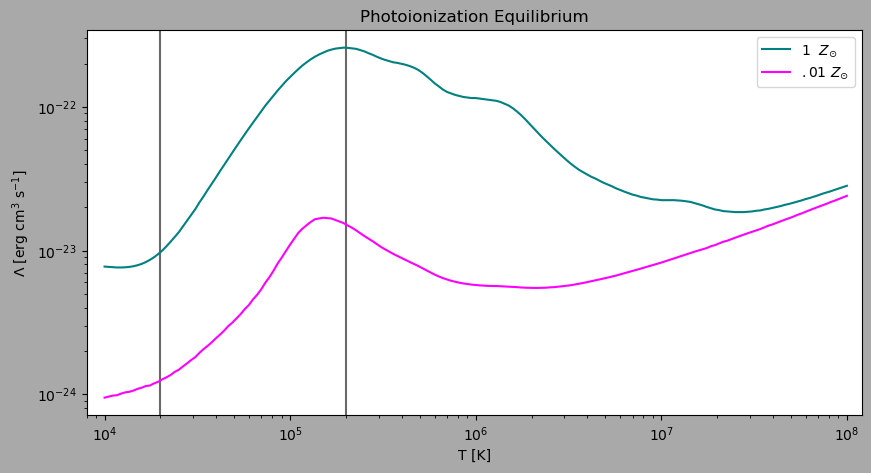

In [12]:
fig,ax = plt.subplots(figsize=(10,5))
fig.set_facecolor('darkgray')
ax.set_xlabel('T [K]')
ax.set_ylabel(r"$\Lambda$ [erg cm$^3$ s$^{-1}$]")
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_title("Photoionization Equilibrium")
ax.set_xlim((8e3, 1.2e8))
ax.vlines(x=[2e4,2e5], ymin=1e-25, ymax=1e-21, color='dimgray')
plt.plot(PIE_pd[0], PIE_pd[4], color='teal', linewidth=1.5, label="$1\ \ Z_{\odot}$")
plt.plot(PIE_pd[0], PIE_pd[2], color='magenta', linewidth=1.5, label="$.01\ Z_{\odot}$")
plt.legend()

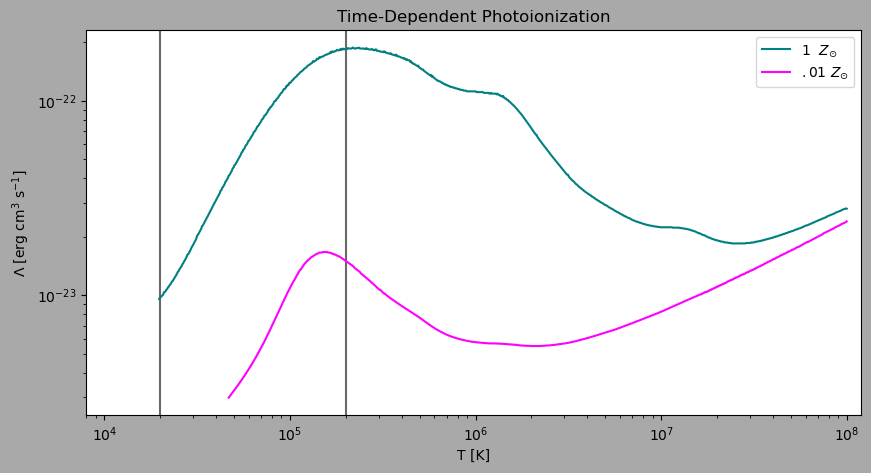

In [13]:
fig,ax = plt.subplots(figsize=(10,5))
fig.set_facecolor('darkgray')
ax.set_xlabel('T [K]')
ax.set_ylabel(r"$\Lambda$ [erg cm$^3$ s$^{-1}$]")
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_title("Time-Dependent Photoionization")
ax.set_xlim((8e3, 1.2e8))
ax.vlines(x=[2e4,2e5], ymin=1e-24, ymax=1e-21, color='dimgray')
plt.plot(PINE_pd[0], PINE_pd[4], color='teal', linewidth=1.5, label="$1\ \ Z_{\odot}$")
plt.plot(PINE_pd[0], PINE_pd[2], color='magenta', linewidth=1.5, label="$.01\ Z_{\odot}$")
plt.legend()

### part b

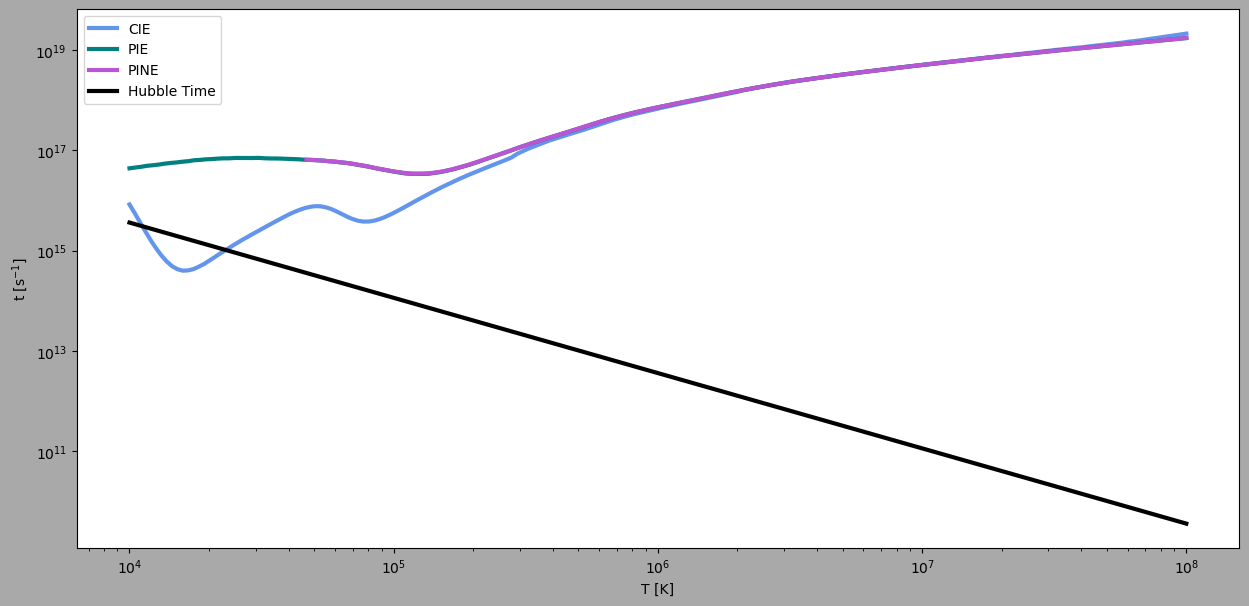

In [14]:
H_0 = 100*h_cosmo # m/s/Mpc 
H_0 /= 3.086e22 # using 3.068e22 m/Mpc, convert H_0 to s^-1 units!
Omega_m = .3
Omega_lambda = .7

def t_H(T):
    return 1 / (H_0*np.sqrt((Omega_m*(T/T_0)**3 + Omega_lambda)))

def t_cool(T, cooling, n_H=1e-4):
    return 3*k*T/(n_H*cooling)

fig,ax = plt.subplots(figsize=(15,7))
fig.set_facecolor('darkgray')
ax.set_xlabel('T [K]')
ax.set_ylabel(r"t [s$^{-1}$]")
ax.set_yscale('log')
ax.set_xscale('log')

dfs = {'CIE':CIE_pd, 'PIE':PIE_pd, 'PINE':PINE_pd}
colors = {'CIE':'cornflowerblue', 'PIE':'teal', 'PINE':'mediumorchid'}
for key in dfs:
    Ts = dfs[key][0]
    coolings = dfs[key][2]
    ax.plot(Ts, t_cool(Ts,coolings), c=colors[key], label=key, linewidth=3)

Ts = np.logspace(4,8,600)
ax.plot(Ts, t_H(Ts), c='black', linewidth=3, label='Hubble Time')
plt.legend()

## Problem 3

In [66]:
from scipy.integrate import quad
def get_n_e(z):
    n_H = 8e-6 * Omega_b * h_cosmo**2 * (1 + z)**3
    def f(X):
        RHS = 1/n_H * ((2*np.pi*m_e*k*T_0*(1+z))/(h**2))**(3/2) *np.exp(-chi_HI_HII/(k*T_0*(1+z)))
        LHS = X**2/(1-X)
        return np.abs(RHS-LHS)

    xs = np.linspace(.001,.999,int(1e6))
    fs = f(xs)
    return xs[np.argmin(fs)] * n_H

c = 3e10 #cm/s
sigma_T = 6.652e-25 #cm^2
G = 6.67e-8
m_p = 1.6726e-24

def H(z):
    return H_0 * np.sqrt((Omega_m*(1+z)**3 + Omega_lambda))

def get_Tao(z):
    def integrand(z):
        return c*sigma_T*get_n_e(z) / ((1+z)*H(z))
    return quad(integrand, 0, z,)[0]

print(f"Tao_r(z_r=9) = {get_Tao(9):.3f}")

Tao_r(z_r=9) = 0.057
